# Clustering Yelp Restaurants

**Part 1: To be completed INDIVIDUALLY and due on October 14 at 7pm.**

In this assignment, we will be working with the [Yelp dataset](https://drive.google.com/open?id=0B4bdB5WPHGsqcmJMNmxzQmQ3aTQ). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

From the Business Objects, let's try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You may want to use only a subset (15-20) of popular categories.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

In [1]:
import json
data = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    data.append(json.loads(line))

In [2]:
from pandas import DataFrame
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scale =  MinMaxScaler()
df = DataFrame(data)
df = df[df['city'] == 'Las Vegas'][['categories', 'latitude', 'longitude']]
df['categories'] = df['categories'].apply(lambda x: ', '.join(x))
df = df[df['categories'].str.contains('restaurant', case = False)]
df_similarity = df['categories']
df_closeness = df[['latitude', 'longitude']]
df_closeness = DataFrame(scale.fit_transform(df_closeness.as_matrix()))

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vec = TfidfVectorizer(min_df = 0.01, max_df = 0.5)
m = vec.fit_transform(df_similarity)
df_feature = DataFrame(m.toarray())
df_feature = DataFrame(scale.fit_transform(df_feature.as_matrix()))
df_feature[['latitude', 'longitude']] = df_closeness
#First 46 columns are vectorized categorical information, last two columns are location information
df_feature

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,latitude,longitude
0,0.000000,0.0,0.000000,0.0,0.000000,0.623451,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.731492,0.000000,0.625204,0.132460
1,0.405134,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.527572,...,0.000000,0.000000,0.0,0.0,0.630159,0.000000,0.000000,0.000000,0.635982,0.443965
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.073836,0.676051
3,0.000000,0.0,0.000000,0.0,0.000000,0.432366,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.126023,0.647238
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.433191,0.425934
5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.823562,0.000000,0.000000,0.433954,0.436812
6,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.481483,0.398709
7,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.489030,0.454467
8,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.445747,0.403536
9,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.431696,0.431254


In [4]:
#adjust the scale for closeness and similarity, but it turns out that little difference was made after trying several 
#scaler
def scale_dataframe(df, a): 
    df_sparse = df.ix[:,:-2]
    df_new = df.ix[:,-2:].apply(lambda x: a*x) 
    return pd.concat([df_sparse,df_new], axis = 1)

In [5]:
def get_cluster(cluster, df): 
    d = {}
    i = 0
    cluster = cluster.tolist()
    while i < len(cluster):
        if cluster[i] in d:
            d[cluster[i]].append(df.loc[i,].values)
        else:
            d[cluster[i]] = []
            d[cluster[i]].append(df.loc[i,].values)
        i = i+1
    return d

In [6]:
#find the center by average all features
from scipy.spatial.distance import euclidean
def get_center(single_cluster):
    i = 0
    result = []
    d = 51
    while i < d:
        result.append(sum([single_cluster[x][i] for x in range(len(single_cluster[i]))])/len(single_cluster[i]))
        i = i + 1
    return result

In [7]:
#Kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn.metrics as metrics
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    plt.show()

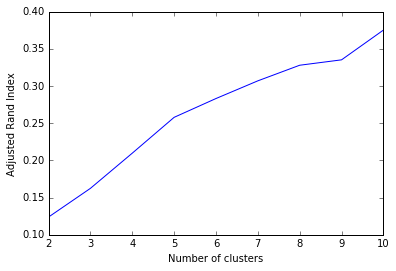

In [64]:
sc_evaluate_clusters(df_feature, 10)
#Notice that the slope become flat after cluster 7, so I choose the number of clusters for K-mean as 7

In [9]:
k=7
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_cluster = kmeans.fit_predict(df_feature, 1.5)

In [10]:
#hierarchical clustering. Use ward distance after I try many options. 
#because it gives less chains and less suspectible with outliers  
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_feature, 'ward')

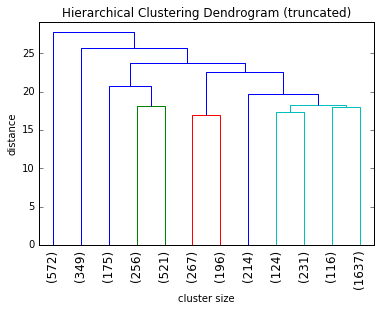

In [11]:
#dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster size')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  
)
plt.show()

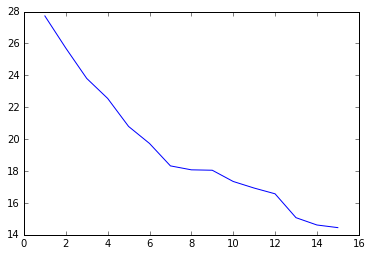

In [12]:
#elbow method for hierarchical clustering to choose k, show k = 7
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.show()

In [13]:
from scipy.cluster.hierarchy import fcluster
k=7
hierarchy_cluster = fcluster(Z, k, criterion='maxclust')
hierarchy_cluster

array([4, 4, 5, ..., 4, 7, 4], dtype=int32)

In [14]:
from sklearn import mixture
def sc_evaluate_gmm(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        gmm = mixture.GMM(n_components=k, covariance_type='full')
        gmm.fit_predict(X)
        label = gmm.predict(X)
        s[k] = metrics.silhouette_score(X,label,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    plt.show()

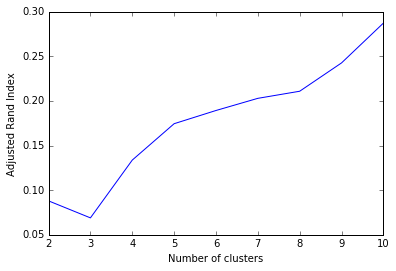

In [15]:

sc_evaluate_gmm(df_feature, 10)

In [16]:
#GMM clustering, choose # of cluster = 7, by the sc score
gmm = mixture.GMM(n_components=7, covariance_type='full')
gmm.fit(df_feature)
gmm_clustering = gmm.predict(df_feature)
gmm_clustering[0:100]

array([3, 0, 2, 3, 4, 4, 3, 2, 0, 1, 0, 6, 4, 5, 2, 5, 1, 1, 1, 5, 2, 3, 0,
       2, 4, 0, 1, 5, 0, 2, 0, 5, 0, 4, 0, 0, 5, 1, 2, 4, 6, 3, 4, 2, 3, 4,
       0, 4, 1, 1, 0, 6, 5, 2, 0, 2, 4, 2, 4, 4, 0, 2, 0, 0, 0, 1, 5, 5, 4,
       4, 2, 4, 0, 4, 3, 6, 0, 0, 5, 5, 3, 4, 4, 6, 0, 5, 1, 6, 6, 5, 2, 1,
       2, 0, 5, 0, 2, 2, 6, 2], dtype=int32)

Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(10 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

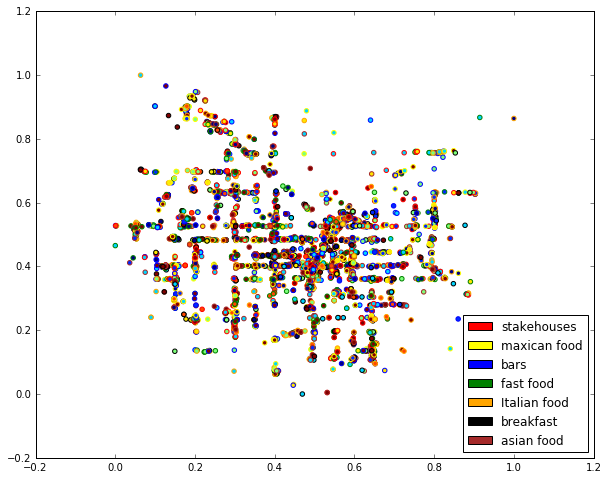

In [29]:
import matplotlib.patches as mpatches
colors = ['red','yellow','blue','green','orange','black','brown']#cluster 0 marked red, cluster 1 marked yellow......
#plot kmeans_cluster
plt.figure(figsize=(10, 8))
plt.scatter(df_feature['longitude'],df_feature['latitude'], c=kmeans_cluster, color=colors)# plot points with cluster dependent colors
classes = ['stakehouses','maxican food', 'bars', 'fast food', 'Italian food','breakfast', 'asian food']
circles = []
for i in range(0,len(colors)):
    circles.append(mpatches.Circle((0,0),1,fc=colors[i]))
plt.legend(circles,classes,loc=4)
plt.show()

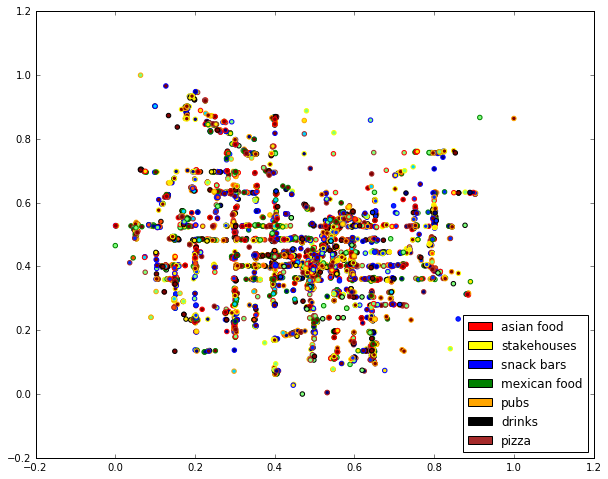

In [33]:
#plot hierarchy_cluster
plt.figure(figsize=(10, 8))
plt.scatter(df_feature['longitude'],df_feature['latitude'], c=hierarchy_cluster, color=colors)  # plot points with cluster dependent colors
classes = ['asian food', 'stakehouses', 'snack bars', 'mexican food', 'pubs', 'drinks', 'pizza']
circles = []
for i in range(0,len(colors)):
    circles.append(mpatches.Circle((0,0),1,fc=colors[i]))
plt.legend(circles,classes,loc=4)
plt.show()

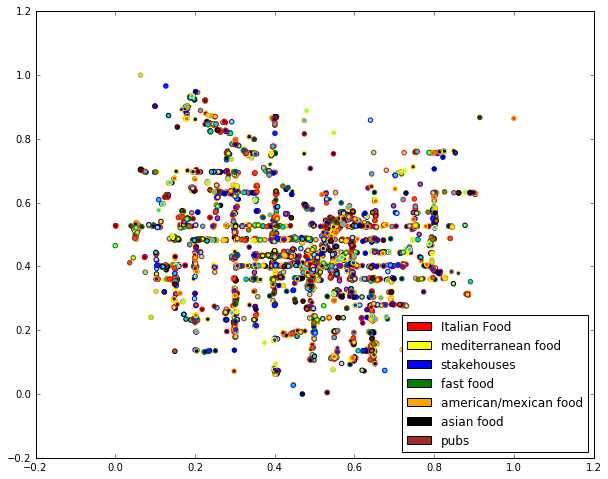

In [36]:
#plot gmm_cluster
plt.figure(figsize=(10, 8))
plt.scatter(df_feature['longitude'],df_feature['latitude'], c=gmm_clustering, color=colors)  # plot points with cluster dependent colors
classes = ['Italian Food', 'mediterranean food', 'stakehouses', 'fast food', 'american/mexican food', 'asian food', 'pubs']
circles = []
for i in range(0,len(colors)):
    circles.append(mpatches.Circle((0,0),1,fc=colors[i]))
plt.legend(circles,classes,loc=4)
plt.show()

In [20]:
#label kmeans clustering by the hot terms 
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vec.get_feature_names()
for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :10]:
        if ind < 48:
            print(' {}'.format(terms[ind]))
    print('')

Top terms per cluster:
Cluster 0:
 chinese
 italian
 thai
 steakhouses
 seafood
 buffets
 dogs
 hot

Cluster 1:
 mexican
 seafood
 nightlife
 american
 food
 bars
 hawaiian
 cafes

Cluster 2:
 american
 traditional
 new
 bars
 nightlife
 sports
 brunch
 breakfast

Cluster 3:
 fast
 food
 burgers
 sandwiches
 mexican
 chicken
 tex

Cluster 4:
 pizza
 italian
 salad
 chicken
 delis
 burgers
 food

Cluster 5:
 sandwiches
 salad
 delis
 food
 chicken
 pizza
 breakfast

Cluster 6:
 bars
 japanese
 sushi
 barbeque
 nightlife
 asian
 fusion
 cafes



For kmeans, I use the centroid as the representative for each cluster and find out top terms after order each feature of the centroid by their magnitude. As a result, the cluster 0 is labeled as stakehouses, cluster 1 is labeled as maxican food. cluster 2 is American bars, cluster 3 is fast food, cluster 4 is Italian food. Cluster 5 is breakfast restaurants and cluster 6 is asian food.    

In [32]:
#label the hierarchical clusters by hot terms
hcluster = get_cluster(hierarchy_cluster, df_feature)
hierarchy_center = []
for i in range(1,8):
    hierarchy_center.append(np.asarray(get_center(hcluster[i])).argsort())
for i in range(7):
    print("Cluster {}:".format(i))
    for ind in hierarchy_center[i][0:20]:
        print(' {}'.format(terms[ind]))
    print('')

Cluster 0:
 american
 lounges
 mediterranean
 mex
 new
 nightlife
 pizza
 pubs
 salad
 seafood
 korean
 smoothies
 steakhouses
 sushi
 tea
 tex
 thai
 traditional
 vietnamese
 wine

Cluster 1:
 american
 lounges
 mediterranean
 mex
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches
 seafood
 smoothies
 sports
 steakhouses
 sushi
 tea
 tex
 thai
 traditional
 vietnamese

Cluster 2:
 juice
 hawaiian
 tex
 japanese
 vietnamese
 korean
 mediterranean
 mex
 pizza
 salad
 sandwiches
 seafood
 smoothies
 sports
 sushi
 tea
 fusion
 filipino
 hot
 thai

Cluster 3:
 juice
 tex
 tea
 sushi
 smoothies
 sandwiches
 mexican
 mex
 mediterranean
 korean
 japanese
 thai
 hawaiian
 fusion
 filipino
 entertainment
 hot
 vietnamese
 wings
 bakeries

Cluster 4:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pubs
 salad
 sandwiches
 seafood
 smoothies
 sports
 steakhouses
 sushi
 tea
 tex
 thai
 traditional
 vietnamese

Cluster 5:
 juice
 wine
 korean
 lounges
 mediterranean
 mex
 mexican
 n

For hierarchical clusters I compute an artificial centroid by average all features for all points in the same cluster for each cluster and assign labels by the same principle as kmeans. But it seems that there are some common terms appear in all clusters so that they may not be meaningful and I ignore them when assign labels. 
Cluster 0：asian food
Cluster 1: stakehouses
Cluster 2: snack bars
Cluster 3: mexican food
Cluster 4: pubs
Cluster 5: drinks
Cluster 6: pizza


In [35]:
#label the gmm clusters by hot terms
cluster_gmm = get_cluster(gmm_clustering, df_feature)
gmm_center = []
for i in range(7):
    gmm_center.append(np.asarray(get_center(cluster_gmm[i])).argsort())
for i in range(7):
    print("Cluster {}:".format(i))
    for ind in gmm_center[i][:20]:
        print(' {}'.format(terms[ind]))
    print('')

Cluster 0:
 juice
 hawaiian
 italian
 japanese
 tea
 korean
 lounges
 sports
 mediterranean
 pizza
 pubs
 salad
 sushi
 seafood
 smoothies
 new
 filipino
 fusion
 entertainment
 arts

Cluster 1:
 american
 lounges
 mex
 mexican
 new
 pizza
 pubs
 seafood
 smoothies
 sports
 sushi
 tea
 tex
 thai
 traditional
 wings
 japanese
 hot
 juice
 brunch

Cluster 2:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pubs
 salad
 seafood
 smoothies
 sports
 steakhouses
 sushi
 tea
 tex
 thai
 traditional
 vietnamese
 wine

Cluster 3:
 juice
 tex
 tea
 sushi
 smoothies
 sandwiches
 salad
 mexican
 mex
 mediterranean
 korean
 japanese
 thai
 hawaiian
 fusion
 fast
 hot
 dogs
 asian
 bakeries

Cluster 4:
 american
 korean
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches
 smoothies
 sports
 steakhouses
 tea
 tex
 traditional
 wine
 wings

Cluster 5:
 juice
 italian
 japanese
 traditional
 korean
 lounges
 mediterranean
 mex
 thai
 new
 tex
 pizza
 pu

Again, I create "centers" for every cluster generated by gmm and label each cluster by the hot terms associated with their center. 
Cluster 0: Italian Food
Cluster 1: mediterranean food
Cluster 2: stakehouses
Cluster 3: fast food
Cluster 4: american/mexican food
Cluster 5: asian food
Cluster 6: pubs

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

In [23]:
def get_outliers(cluster, center):
    distance = 0
    target = cluster[0]
    for point in cluster:
        if distance < euclidean(point, center):
            distance = euclidean(point, center)
            target = point
    return point

In [24]:
#For kmeans outliers
kmeans_outliers = []
kmeams_center = kmeans.cluster_centers_.tolist()
kcluster = get_cluster(kmeans_cluster, df_feature)
for i in range(7):
    kmeans_outliers.append(get_outliers(kcluster[i], kmeams_center[i]).argsort())
for i in range(7):
    print("Hot terms for outlier in cluster {}:".format(i))
    for ind in kmeans_outliers[i][:10]:
        print(' {}'.format(terms[ind]))
    print('')

Hot terms for outlier in cluster 0:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad

Hot terms for outlier in cluster 1:
 american
 lounges
 mediterranean
 mex
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 2:
 juice
 korean
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs

Hot terms for outlier in cluster 3:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad

Hot terms for outlier in cluster 4:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 pubs
 salad
 sandwiches
 seafood

Hot terms for outlier in cluster 5:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 seafood

Hot terms for outlier in cluster 6:
 american
 mediterranean
 mex
 mexican
 new
 pizza
 pubs
 salad
 sandwiches
 seafood



In [25]:
#For hierarchical outliers
hierarchical_outliers = []
hierarchical_center = []
for i in range(1,8):
    hierarchical_center.append(get_center(hcluster[i]))
for i in range(7):
    hierarchical_outliers.append(get_outliers(hcluster[i+1], hierarchical_center[i]).argsort())
for i in range(7):
    print("Hot terms for outlier in cluster {}:".format(i))
    for ind in hierarchical_outliers[i][:10]:
        print(' {}'.format(terms[ind]))
    print('')

Hot terms for outlier in cluster 0:
 american
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 1:
 american
 lounges
 mediterranean
 mex
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 2:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 seafood

Hot terms for outlier in cluster 3:
 juice
 korean
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs

Hot terms for outlier in cluster 4:
 american
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 5:
 american
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 6:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 seafood



In [26]:
#For gmm outliers
gmm_outliers = []
GMM_center = []
for i in range(7):
    GMM_center.append(get_center(cluster_gmm[i]))
for i in range(7):
    gmm_outliers.append(get_outliers(cluster_gmm[i], GMM_center[i]).argsort())
for i in range(7):
    print("Hot terms for outlier in cluster {}:".format(i))
    for ind in gmm_outliers[i][:10]:
        print(' {}'.format(terms[ind]))
    print('')

Hot terms for outlier in cluster 0:
 juice
 korean
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs

Hot terms for outlier in cluster 1:
 american
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 2:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 seafood

Hot terms for outlier in cluster 3:
 american
 mediterranean
 mex
 mexican
 new
 pizza
 pubs
 salad
 sandwiches
 seafood

Hot terms for outlier in cluster 4:
 american
 lounges
 mediterranean
 mex
 mexican
 new
 nightlife
 pizza
 pubs
 salad

Hot terms for outlier in cluster 5:
 american
 lounges
 mediterranean
 mex
 new
 nightlife
 pizza
 pubs
 salad
 sandwiches

Hot terms for outlier in cluster 6:
 juice
 italian
 japanese
 thai
 korean
 lounges
 mediterranean
 mex
 mexican
 tex



Notice that the hot terms in outliers are the terms that appears most frequently, and outliers in different clusters are not differed by too much. Words like "american", "mediterranean", "mexican" are very likely to appear as categories in outliers, which means that they are similar type of restaurants as their cluster member but different in location(i.e. restaurants in some remote area). 

Give a detailed analysis comparing the results you obtained from the 3 techniques. **(10 pts)**

The kmeans and hierarchical clustering method give contagious cluster in the 2D scatter plot, which means that closeness plays a large part on the determination of similarity. But GMM clustering gives discursive pattern expecially in the center of the city, which make sense because different types of restaurants can select locations close to each other. Also, the centroids of kmeans represent kmeans relatively well than the other two methods, as we can see from the hot terms associated with the kmean clusters we can get an idea of what the cluster about, but for the other two method the hot terms are just some most frequently appeared words that appear in many clusters. The reason may lies in the fact that there are no natural center for hierarchical clustering and GMM, so in order to get an idea what their clusters about we should look into all members inside clusters other than just looking at one representative point. In my analysis above, I believe kmeans method gives the best performance so I would like to use the labels for kmeans clusters as my final result for culinary districts in Las Vegas.

----------